In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time
import math
import torchvision
from torchvision import transforms as transforms

%tensorflow_version 1.x
import tensorflow as tf
import tensorflow_hub as hub
import os
%pylab inline

TensorFlow 1.x selected.
Populating the interactive namespace from numpy and matplotlib


In [0]:
from SIT import *
from fid_score import *
from load_data import *

In [0]:
def evaluate_fid_score(fake_images, real_images,norm=False):
    np.random.shuffle(real_images)
    real_images = real_images[0:10000]
    real_images = preprocess_fake_images(real_images, norm)
    fake_images = preprocess_fake_images(fake_images, norm)
    print(real_images.shape, fake_images.shape)
    inception_path = check_or_download_inception()

    create_inception_graph(inception_path)
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())

    print('calculating tf features...')
    real_out = get_activations_tf(real_images, sess)
    fake_out = get_activations_tf(fake_images, sess)
    fid_result = fid_score(real_out, fake_out)

    return fid_result

We didn't set a specific random seed, so the samples presented here may not be the same as the ones shown in the paper. But their quality should be the same.

# Max Sliced Wasserstein Distance (Figure 1)

In [0]:
Nsample = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000, 256000, 512000]
ndim = 784
MaxSWD = []
for nsample in Nsample:
    sample1 = torch.randn(nsample, ndim).cuda()
    sample2 = torch.randn(nsample, ndim).cuda()
    maxSWD = 0
    for i in range(10):
        wT, SWD = maxSWDdirection(sample1, sample2, n_component=1, maxiter=500, Npercentile=None, p=2, eps=1e-6)
        if SWD > maxSWD:
            maxSWD = SWD.item()
    MaxSWD.append(maxSWD)

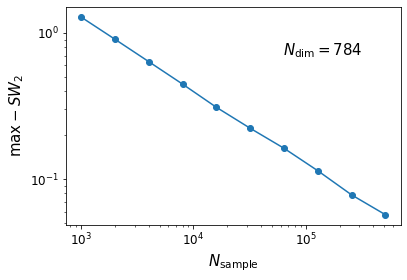

In [0]:
plt.plot(Nsample, MaxSWD, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$N_{\mathrm{sample}}$', fontsize=15)
plt.ylabel('$\max-SW_2$', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(10**4.8, 0.7, '$N_{\mathrm{dim}}=784$', fontsize=15)
plt.savefig('maxSW2_dim784.pdf')
plt.show()

In [0]:
Ndim = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
nsample = 60000
MaxSWD = []
for ndim in Ndim:
    sample1 = torch.randn(nsample, ndim).cuda()
    sample2 = torch.randn(nsample, ndim).cuda()
    maxSWD = 0
    for i in range(10):
        wT, SWD = maxSWDdirection(sample1, sample2, n_component=1, maxiter=500, Npercentile=None, p=2, eps=1e-6)
        if SWD > maxSWD:
            maxSWD = SWD.item()
    MaxSWD.append(maxSWD)

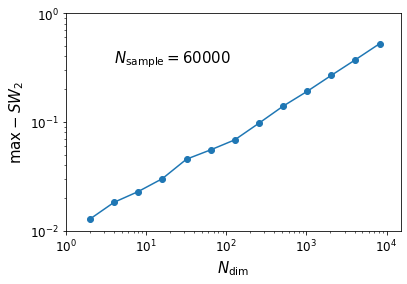

In [0]:
plt.plot(Ndim, MaxSWD, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 15000)
plt.ylim(0.01, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$N_{\mathrm{dim}}$', fontsize=15)
plt.ylabel('$\max-SW_2$', fontsize=15)
plt.text(4, 0.35, '$N_{\mathrm{sample}}=60000$', fontsize=15)
plt.savefig('maxSW2_sample60000.pdf')
plt.show()

# Samples (Figure 2 (a), (b), (c), (d), (e))

#### MNIST (Figure 2 (a))

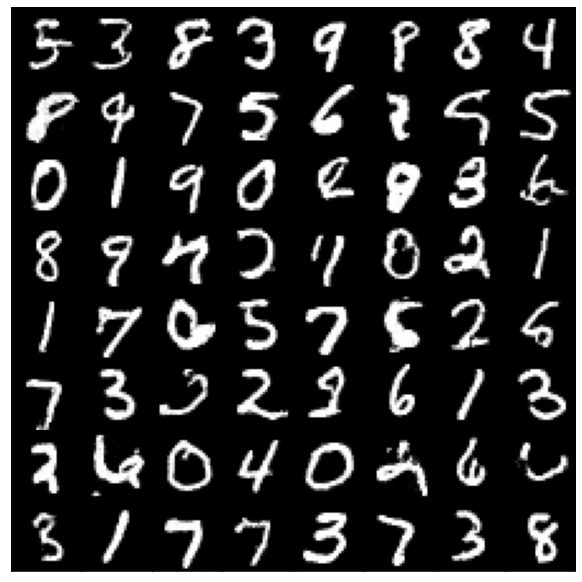

In [0]:
model = torch.load('SIG_MNIST_hierarchy')
sample = model.sample(64)[0]
sample = (sample+1)*128
sample = sample.cpu().numpy().astype(int)
sample[sample<0] = 0
sample[sample>255] = 255

f = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(8, 8)
for i in range(8):
    for j in range(8):
        ax = plt.subplot(gs[i,j])
        ax.imshow(sample[8*i+j].reshape(28,28), vmin=0, vmax=255, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
f.subplots_adjust(hspace = 0, wspace=0)
f.subplots_adjust(left = 0.01, right = 0.99, top = 0.99, bottom = 0.01)
plt.savefig('MNISTsample.pdf')
plt.show()

#### FashionMNIST (Figure 2 (b))

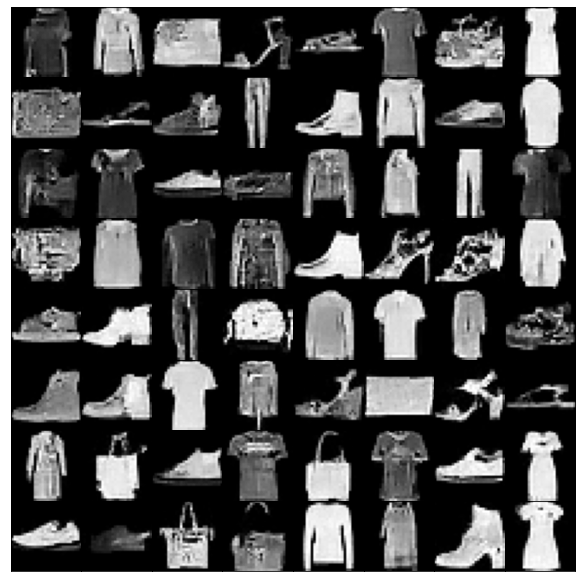

In [0]:
model = torch.load('SIG_FashionMNIST_hierarchy')
sample = model.sample(64)[0]
sample = (sample+1)*128
sample = sample.cpu().numpy().astype(int)
sample[sample<0] = 0
sample[sample>255] = 255

f = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(8, 8)
for i in range(8):
    for j in range(8):
        ax = plt.subplot(gs[i,j])
        ax.imshow(sample[8*i+j].reshape(28,28), vmin=0, vmax=255, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
f.subplots_adjust(hspace = 0, wspace=0)
f.subplots_adjust(left = 0.01, right = 0.99, top = 0.99, bottom = 0.01)
plt.savefig('FashionMNISTsample.pdf')
plt.show()

#### CIFAR-10 (Figure 2 (c))

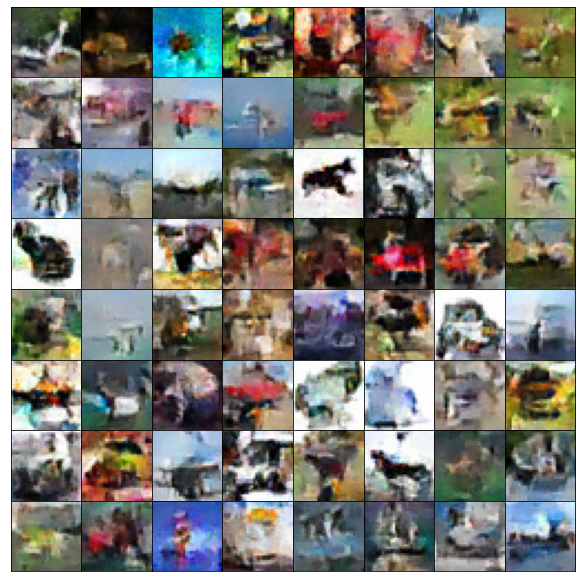

In [0]:
model = torch.load('SIG_CIFAR10_hierarchy')
sample = model.sample(64)[0]
sample = (sample+1)*128
sample = sample.cpu().numpy().astype(int)
sample[sample<0] = 0
sample[sample>255] = 255

f = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(8, 8)
for i in range(8):
    for j in range(8):
        ax = plt.subplot(gs[i,j])
        ax.imshow(sample[8*i+j].reshape(32,32,3))
        ax.set_xticks([])
        ax.set_yticks([])
f.subplots_adjust(hspace = 0, wspace=0)
f.subplots_adjust(left = 0.01, right = 0.99, top = 0.99, bottom = 0.01)
plt.savefig('CIFAR10sample.pdf')
plt.show()

#### CelebA 32*32 (Figure 2 (d))

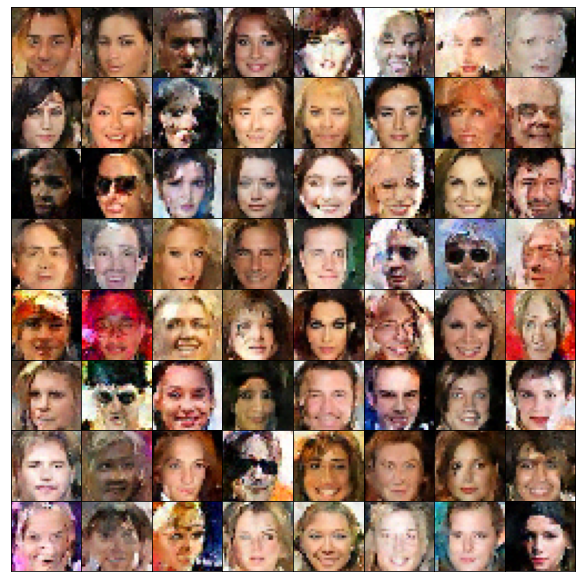

In [0]:
model = torch.load('SIG_CelebA_hierarchy')
sample = model.sample(64)[0]
sample = (sample+1)*128
sample = sample.cpu().numpy().astype(int)
sample[sample<0] = 0
sample[sample>255] = 255

f = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(8, 8)
for i in range(8):
    for j in range(8):
        ax = plt.subplot(gs[i,j])
        ax.imshow(sample[8*i+j].reshape(32,32,3))
        ax.set_xticks([])
        ax.set_yticks([])
f.subplots_adjust(hspace = 0, wspace=0)
f.subplots_adjust(left = 0.01, right = 0.99, top = 0.99, bottom = 0.01)
plt.savefig('CelebAsample.pdf')
plt.show()

#### CelebA 64*64 (Figure 2 (e))

In [0]:
path = 'AE_CelebA_latent64'
generator_path   = os.path.join(path,'decoder')
encoder_path     = os.path.join(path,'encoder')

latent_dim = 64

tf.reset_default_graph()

data          = tf.placeholder(shape=[16, 64, 64, 3],dtype=tf.float32)
latent_data   = tf.placeholder(shape=[None,latent_dim], dtype=tf.float32)
encoder       = hub.Module(encoder_path, trainable=False)
decoder       = hub.Module(generator_path, trainable=False)

encoded, _    = tf.split(encoder({'x':data},as_dict=True)['z'], 2, axis=-1)
reconstruct   = decoder({'z':encoded},as_dict=True)['x']
decoded       = decoder({'z':latent_data},as_dict=True)['x']

sess = tf.Session()
sess.run(tf.global_variables_initializer())

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
model = torch.load('/content/drive/My Drive/SIG/SIG_CelebA_AE64')

In [0]:
latent_dim = 64

chunk_size = 16
start = 0
end = chunk_size
sample0 = np.zeros((sample.shape[0], 64, 64, 3))
while(True):
    sample0[start:end] = sess.run(decoded, feed_dict={latent_data:sample[start:end].cpu().numpy()})

    start = end
    end = end+chunk_size
    if start >= sample.shape[0]:
        break
    if end > sample.shape[0]:
        end = sample.shape[0]
        start = end - chunk_size

In [0]:
sample0 = (sample0+0.5) * 255
sample0 = sample0.astype(int)
sample0[sample0<0] = 0
sample0[sample0>255] = 255

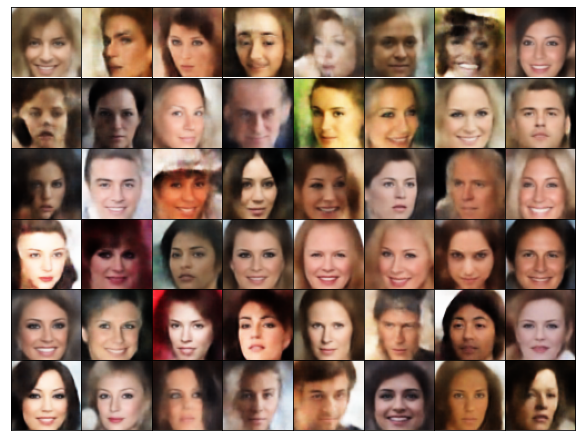

In [0]:
f = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(6, 8)
for i in range(6):
    for j in range(8):
        ax = plt.subplot(gs[i,j])
        ax.imshow(sample0[8*i+j])
        ax.set_xticks([])
        ax.set_yticks([])
f.subplots_adjust(hspace = 0, wspace=0)
f.subplots_adjust(left = 0.01, right = 0.99, top = 0.99, bottom = 0.01)
plt.savefig('CelebAsample_AE64.pdf')
plt.show()

# FID score (Figure 2 (f), Table 1)

#### FID score as a function of number of iterations (Figure 2 (f))

In [0]:
niter = np.linspace(100,2000,20, endpoint=True, dtype=int)
fid_mnist = []

In [0]:
model = torch.load('SIG_MNIST_hierarchy')

In [0]:
data_train, data_test = load_data_mnist()
data_test = data_test.numpy()

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
torch.manual_seed(738)
sample0 = torch.randn(10000, 784, device=torch.device('cuda'))

for step in niter:
    start = 100-step
    if start == 0:
        start = None
    sample0 = model.inverse(sample0, start=start, end=-step)[0]

    sample = (sample0+1)*128
    sample = sample.cpu().numpy().astype(int)
    sample[sample<0] = 0
    sample[sample>255] = 255
    sample = sample.astype(float)

    fid_mnist.append(evaluate_fid_score(fake_images=sample.reshape(10000,28,28,1).astype('float'), real_images=data_test.reshape(-1,28,28,1).astype('float'), norm=True))
    print (step.item(), fid_mnist[-1])
    print ()

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)


/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


calculating tf features...
100 142.93178086683383

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
200 121.71250925025868

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
300 121.1158946369521

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
400 22.58963639337324

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
500 14.921369304105129

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
600 11.697895421041794

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
700 10.171886660955554

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
800 9.08184398049494

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
900 8.312173259045883

norm =  True
norm =  True
(10000, 

In [0]:
niter = np.linspace(100,2000,20, endpoint=True, dtype=int)
fid_fmnist = []

In [0]:
model = torch.load('SIG_FashionMNIST_hierarchy')

In [0]:
data_train, data_test = load_data_fmnist()
data_test = data_test.numpy()

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [0]:
sample0 = torch.randn(10000, 784, device=torch.device('cuda'))

for step in niter:
    start = 100-step
    if start == 0:
        start = None
    sample0 = model.inverse(sample0, start=start, end=-step)[0]

    sample = (sample0+1)*128
    sample = sample.cpu().numpy().astype(int)
    sample[sample<0] = 0
    sample[sample>255] = 255
    sample = sample.astype(float)

    fid_fmnist.append(evaluate_fid_score(fake_images=sample.reshape(10000,28,28,1).astype('float'), real_images=data_test.reshape(-1,28,28,1).astype('float'), norm=True))
    print (step.item(), fid_fmnist[-1])
    print ()

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)




/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


calculating tf features...
100 162.95684987333215

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
200 144.42225279813846

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
300 142.11154081624048

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
400 41.633650510741376

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
500 29.19000519814336

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
600 25.130947014732868

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
700 22.542089436062604

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
800 21.16097832273536

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
calculating tf features...
900 20.372497801803064

norm =  True
norm =  True
(1000

In [0]:
niter = np.linspace(100,1500,15, endpoint=True, dtype=int)
fid_cifar10 = []

In [0]:
model = torch.load('SIG_CIFAR10_hierarchy')

In [0]:
data_train, data_test = load_data_cifar10()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
torch.manual_seed(738)
sample0 = torch.randn(10000, 3072, device=torch.device('cuda'))

for step in niter:
    start = 100-step
    if start == 0:
        start = None
    sample0[:5000] = model.inverse(sample0[:5000], start=start, end=-step)[0]
    sample0[5000:] = model.inverse(sample0[5000:], start=start, end=-step)[0]

    sample = (sample0+1)*128
    sample = sample.cpu().numpy().astype(int)
    sample[sample<0] = 0
    sample[sample>255] = 255
    sample = sample.astype(float)

    fid_cifar10.append(evaluate_fid_score(fake_images=sample.reshape(10000,32,32,3).astype('float'), real_images=data_test.reshape(-1,32,32,3).astype('float'), norm=True))
    print (step.item(), fid_cifar10[-1])
    print ()

norm =  True
norm =  True
(10000, 32, 32, 3) (10000, 32, 32, 3)
Instructions for updating:
Use tf.gfile.GFile.

calculating tf features...
100 276.5927080716292

norm =  True
norm =  True
(10000, 32, 32, 3) (10000, 32, 32, 3)


/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


calculating tf features...
200 269.52875687859097

norm =  True
norm =  True
(10000, 32, 32, 3) (10000, 32, 32, 3)
calculating tf features...
300 263.9492372286811

norm =  True
norm =  True
(10000, 32, 32, 3) (10000, 32, 32, 3)
calculating tf features...
400 188.40345471593406

norm =  True
norm =  True
(10000, 32, 32, 3) (10000, 32, 32, 3)
calculating tf features...
500 145.73361497524985

norm =  True
norm =  True
(10000, 32, 32, 3) (10000, 32, 32, 3)
calculating tf features...
600 124.56474401622614

norm =  True
norm =  True
(10000, 32, 32, 3) (10000, 32, 32, 3)
calculating tf features...
700 113.32666403647524

norm =  True
norm =  True
(10000, 32, 32, 3) (10000, 32, 32, 3)
calculating tf features...
800 106.2989399802715

norm =  True
norm =  True
(10000, 32, 32, 3) (10000, 32, 32, 3)
calculating tf features...
900 101.95146672670975

norm =  True
norm =  True
(10000, 32, 32, 3) (10000, 32, 32, 3)
calculating tf features...
1000 98.71177820231901

norm =  True
norm =  True
(1000

In [0]:
niter = np.linspace(100,2000,20, endpoint=True, dtype=int)

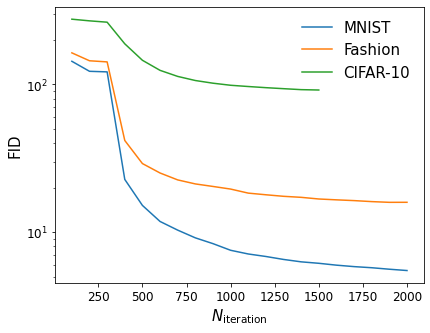

In [0]:
f = plt.figure(figsize=(6.4, 4.8))
plt.plot(niter, fid_mnist, label='MNIST')
plt.plot(niter, fid_fmnist, label='Fashion')
plt.plot(niter[:15], fid_cifar10, label='CIFAR-10')
plt.legend(frameon=False, fontsize=15)
plt.xlabel('$N_{\mathrm{iteration}}$', fontsize=15)
plt.ylabel('FID', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
f.subplots_adjust(left = 0.15, right = 0.95, top = 0.95, bottom = 0.15)
plt.savefig('/content/drive/My Drive/figure/fid.pdf')
plt.show()

#### FID score (Table 1)

MNIST

In [0]:
data_train, data_test = load_data_mnist()
data_test = data_test.numpy()

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
model = torch.load('SIG_MNIST_hierarchy')
sample = model.sample(10000)[0]
sample = (sample+1)*128
sample = sample.cpu().numpy().astype(int)
sample[sample<0] = 0
sample[sample>255] = 255

In [0]:
fid = evaluate_fid_score(fake_images=sample.reshape(10000,28,28,1).astype('float'), real_images=data_test.reshape(-1,28,28,1).astype('float'), norm=True)

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)
Instructions for updating:
Use tf.gfile.GFile.

calculating tf features...


FashionMNIST

In [0]:
data_train, data_test = load_data_fmnist()
data_test = data_test.numpy()

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [0]:
model = torch.load('SIG_FashionMNIST_hierarchy')
sample = model.sample(10000)[0]
sample = (sample+1)*128
sample = sample.cpu().numpy().astype(int)
sample[sample<0] = 0
sample[sample>255] = 255

In [0]:
fid = evaluate_fid_score(fake_images=sample.reshape(10000,28,28,1).astype('float'), real_images=data_test.reshape(-1,28,28,1).astype('float'), norm=True)

norm =  True
norm =  True
(10000, 28, 28, 3) (10000, 28, 28, 3)


/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


calculating tf features...


CIFAR-10

In [0]:
data_train, data_test = load_data_cifar10()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
model = torch.load('SIG_CIFAR10_hierarchy')
sample = torch.zeros(10000, 3072)
sample[:5000] = model.sample(5000, end=-10)[0]
sample[5000:] = model.sample(5000, end=-10)[0]
sample = (sample+1)*128
sample = sample.cpu().numpy().astype(int)
sample[sample<0] = 0
sample[sample>255] = 255

In [0]:
fid = evaluate_fid_score(fake_images=sample.reshape(10000,32,32,3).astype('float'), real_images=data_test.reshape(-1,32,32,3).astype('float'), norm=True)

norm =  True
norm =  True
(10000, 32, 32, 3) (10000, 32, 32, 3)
Instructions for updating:
Use tf.gfile.GFile.

calculating tf features...


CelebA (SIG+AE)

In [0]:
data_test = load_data_cifar10(flag='test', side_length=64)

In [0]:
path = '/content/drive/My Drive/SIG/AE_CelebA_latent64'
generator_path   = os.path.join(path,'decoder')
encoder_path     = os.path.join(path,'encoder')

latent_dim = 64

tf.reset_default_graph()

data          = tf.placeholder(shape=[16, 64, 64, 3],dtype=tf.float32)
latent_data   = tf.placeholder(shape=[None,latent_dim], dtype=tf.float32)
encoder       = hub.Module(encoder_path, trainable=False)
decoder       = hub.Module(generator_path, trainable=False)

encoded, _    = tf.split(encoder({'x':data},as_dict=True)['z'], 2, axis=-1)
reconstruct   = decoder({'z':encoded},as_dict=True)['x']
decoded       = decoder({'z':latent_data},as_dict=True)['x']

sess = tf.Session()
sess.run(tf.global_variables_initializer())

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
model = torch.load('SIG_CelebA_AE64')

In [0]:
sample = model.sample(10000)[0]

In [0]:
latent_dim = 64

chunk_size = 16
start = 0
end = chunk_size
sample0 = np.zeros((sample.shape[0], 64, 64, 3))
while(True):
    sample0[start:end] = sess.run(decoded, feed_dict={latent_data:sample[start:end].cpu().numpy()})

    start = end
    end = end+chunk_size
    if start >= sample.shape[0]:
        break
    if end > sample.shape[0]:
        end = sample.shape[0]
        start = end - chunk_size

In [0]:
sample0 = (sample0+0.5) * 255
sample0 = sample0.astype(int)
sample0[sample0<0] = 0
sample0[sample0>255] = 255

In [0]:
fid = evaluate_fid_score(fake_images=sample0.astype('float'), real_images=data_test.astype('float'), norm=True)

norm =  True
norm =  True
(10000, 64, 64, 3) (10000, 64, 64, 3)


/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


calculating tf features...


CelebA (AE reconstruction)

In [0]:
latent_dim = 64

chunk_size = 16
start = 0
end = chunk_size
rec = np.zeros((10000, 64, 64, 3))
while(True):
    rec[start:end] = sess.run(reconstruct, feed_dict={data:data_test[start:end].astype(float)/255-0.5})

    start = end
    end = end+chunk_size
    if start >= rec.shape[0]:
        break
    if end > rec.shape[0]:
        end = rec.shape[0]
        start = end - chunk_size

In [0]:
rec = (rec+0.5) * 255
rec = rec.astype(int)
rec[rec<0] = 0
rec[rec>255] = 255

In [0]:
fid = evaluate_fid_score(fake_images=rec.astype('float'), real_images=data_test.astype('float'), norm=True)

norm =  True
norm =  True
(10000, 64, 64, 3) (10000, 64, 64, 3)


/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


calculating tf features...


# FashionMNIST samples as a function of number of iterations (Figure 3)

In [0]:
model = torch.load('SIG_FashionMNIST_hierarchy')

In [0]:
latent = torch.randn(3,784).cuda()
sample0 = torch.zeros(16,3,784).cuda()
sample0[0] = latent
sample0[1] = model.inverse(latent.clone(), end=-1)[0]
sample0[2] = model.inverse(latent.clone(), end=-2)[0]
sample0[3] = model.inverse(latent.clone(), end=-5)[0]
sample0[4] = model.inverse(latent.clone(), end=-10)[0]
sample0[5] = model.inverse(latent.clone(), end=-20)[0]
sample0[6] = model.inverse(latent.clone(), end=-30)[0]
sample0[7] = model.inverse(latent.clone(), end=-50)[0]
sample0[8] = model.inverse(latent.clone(), end=-75)[0]
sample0[9] = model.inverse(sample0[8].clone(), start=-75, end=-100)[0]
sample0[10] = model.inverse(sample0[9].clone(), start=-100, end=-200)[0]
sample0[11] = model.inverse(sample0[10].clone(), start=-200, end=-300)[0]
sample0[12] = model.inverse(sample0[11].clone(), start=-300, end=-400)[0]
sample0[13] = model.inverse(sample0[12].clone(), start=-400, end=-500)[0]
sample0[14] = model.inverse(sample0[13].clone(), start=-500, end=-1000)[0]
sample0[15] = model.inverse(sample0[14].clone(), start=-1000, end=-2000)[0]

In [0]:
sample0 = (sample0+1)*128
sample0 = sample0.cpu().numpy().reshape(16,3,28,28)
sample0 = sample0.astype(int)
sample0[sample0<0] = 0
sample0[sample0>255] = 255

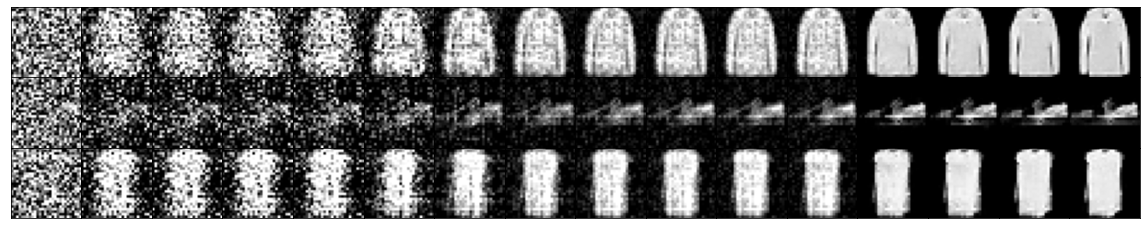

In [0]:
f = plt.figure(figsize=(16, 3))
gs = gridspec.GridSpec(3, 16)
for i in range(3):
    for j in range(16):
        ax = plt.subplot(gs[i,j])
        ax.imshow(sample0[j,i], vmin=0, vmax=255, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
f.subplots_adjust(hspace = 0, wspace=0)
f.subplots_adjust(left = 0.01, right = 0.99, top = 0.99, bottom = 0.01)
plt.savefig('FashionMNIST_samples_hierarchy_niter.pdf')
plt.show()

In [0]:
model = torch.load('SIG_FashionMNIST')

In [0]:
latent = torch.randn(3,784).cuda()
sample0 = torch.zeros(16,3,784).cuda()
sample0[0] = latent
sample0[1] = model.inverse(latent.clone(), end=-1)[0]
sample0[2] = model.inverse(latent.clone(), end=-2)[0]
sample0[3] = model.inverse(latent.clone(), end=-5)[0]
sample0[4] = model.inverse(latent.clone(), end=-10)[0]
sample0[5] = model.inverse(latent.clone(), end=-20)[0]
sample0[6] = model.inverse(latent.clone(), end=-30)[0]
sample0[7] = model.inverse(latent.clone(), end=-50)[0]
sample0[8] = model.inverse(latent.clone(), end=-75)[0]
sample0[9] = model.inverse(sample0[8].clone(), start=-75, end=-100)[0]
sample0[10] = model.inverse(sample0[9].clone(), start=-100, end=-200)[0]
sample0[11] = model.inverse(sample0[10].clone(), start=-200, end=-300)[0]
sample0[12] = model.inverse(sample0[11].clone(), start=-300, end=-400)[0]
sample0[13] = model.inverse(sample0[12].clone(), start=-400, end=-500)[0]
sample0[14] = model.inverse(sample0[13].clone(), start=-500, end=-1000)[0]
sample0[15] = model.inverse(sample0[14].clone(), start=-1000, end=-2000)[0]

In [0]:
sample0 = (sample0+1)*128
sample0 = sample0.cpu().numpy().reshape(16,3,28,28)
sample0 = sample0.astype(int)
sample0[sample0<0] = 0
sample0[sample0>255] = 255

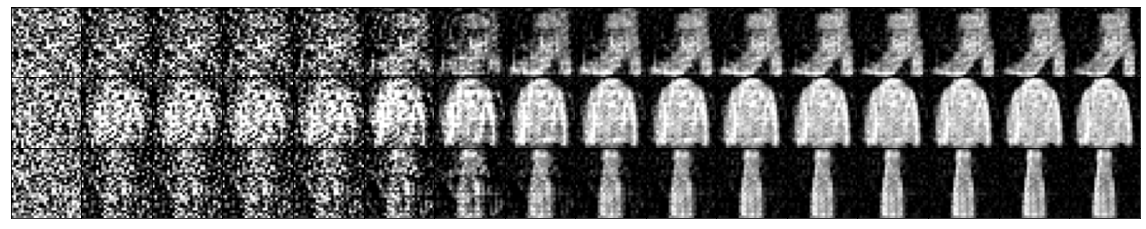

In [0]:
f = plt.figure(figsize=(16, 3))
gs = gridspec.GridSpec(3, 16)
for i in range(3):
    for j in range(16):
        ax = plt.subplot(gs[i,j])
        ax.imshow(sample0[j,i], vmin=0, vmax=255, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
f.subplots_adjust(hspace = 0, wspace=0)
f.subplots_adjust(left = 0.01, right = 0.99, top = 0.99, bottom = 0.01)
#plt.savefig('FashionMNIST_samples_niter.pdf')
plt.show()

# CelebA interpolation (Figure 4 left panel)

In [0]:
model = torch.load('SIG_CelebA_hierarchy')

In [0]:
#interpolation
latent = torch.randn((7, 2, 3072)).cuda()
interp = torch.zeros((7, 10, 3072)).cuda()
interp[:, 0, :] = latent[:, 0, :]
interp[:, -1, :] = latent[:, 1, :]

ninterp = 10

for k in range(1, ninterp-1):
    interp[:, k] = (latent[:,0,:]*(ninterp-1-k) + latent[:,1,:] *k) / (ninterp-1)

r = torch.zeros(7, ninterp).cuda()
r[:,0] = torch.sum(latent[:,0,:]**2, dim=-1)**0.5
r[:,-1] = torch.sum(latent[:,1,:]**2, dim=-1)**0.5
for k in range(1,ninterp-1):
    r[:,k] = (r[:,0]*(ninterp-1-k) + r[:,-1] *k) / (ninterp-1)
    interp[:,k,:] = interp[:,k,:] * (r[:,k] / torch.sum(interp[:,k,:]**2, dim=-1)**0.5).view(-1,1)

print (torch.sum(interp**2, dim=-1)**0.5)
interp = model.inverse(interp.reshape(7*10, 3072), end=-1000)[0]

tensor([[55.9582, 55.8258, 55.6933, 55.5609, 55.4285, 55.2961, 55.1637, 55.0312,
         54.8988, 54.7664],
        [54.0178, 54.1369, 54.2560, 54.3752, 54.4943, 54.6134, 54.7325, 54.8517,
         54.9708, 55.0899],
        [54.1260, 54.2681, 54.4101, 54.5522, 54.6943, 54.8364, 54.9785, 55.1205,
         55.2626, 55.4047],
        [54.4536, 54.5454, 54.6373, 54.7292, 54.8210, 54.9129, 55.0048, 55.0966,
         55.1885, 55.2804],
        [54.8583, 54.9351, 55.0118, 55.0886, 55.1654, 55.2421, 55.3189, 55.3957,
         55.4724, 55.5492],
        [56.2248, 56.1192, 56.0135, 55.9078, 55.8022, 55.6965, 55.5908, 55.4851,
         55.3795, 55.2738],
        [54.3949, 54.5063, 54.6178, 54.7292, 54.8407, 54.9521, 55.0635, 55.1750,
         55.2864, 55.3979]], device='cuda:0')


In [0]:
interp = (interp+1)*128
interp = interp.cpu().numpy().astype(int)
interp[interp<0] = 0
interp[interp>255] = 255

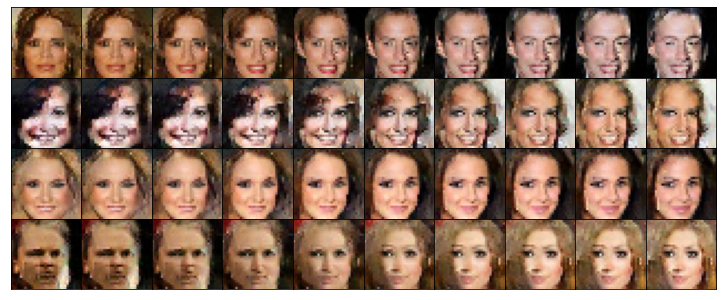

In [0]:
f = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(4, 10)
for i in range(4):
    for j in range(10):
        ax = plt.subplot(gs[i,j])
        ax.imshow(interp[10*i+j].astype(int).reshape(32,32,3))
        ax.set_xticks([])
        ax.set_yticks([])
f.subplots_adjust(hspace = 0, wspace=0)
f.subplots_adjust(left = 0.01, right = 0.99, top = 0.99, bottom = 0.01)
#plt.savefig('/content/drive/My Drive/figure/CelebA_interpolation_hierarchy.pdf')
plt.show()

# CelebA Nearest Training Data (Figure 4 right panel)

In [0]:
data_train = load_data_cifar10(flag='training', side_length=32)

In [0]:
model = torch.load('SIG_CelebA_hierarchy')

In [0]:
sample = model.sample(20)[0]

sample = (sample+1)*128
sample = sample.cpu().numpy().astype(int)
sample[sample<0] = 0
sample[sample>255] = 255

sample0 = np.copy(sample)
sample = np.zeros((40,3072), dtype=int)
sample[:10] = sample0[:10]
sample[20:30] = sample0[10:20]


for i in range(10):
    r = np.sum((sample[i, None, :] - data_train.reshape(-1,3072))**2, axis=1)
    index = np.argmin(r)
    sample[10+i] = data_train[index].reshape(-1).astype(int)
for i in range(10):
    r = np.sum((sample[20+i, None, :] - data_train.reshape(-1,3072))**2, axis=1)
    index = np.argmin(r)
    sample[30+i] = data_train[index].reshape(-1).astype(int)

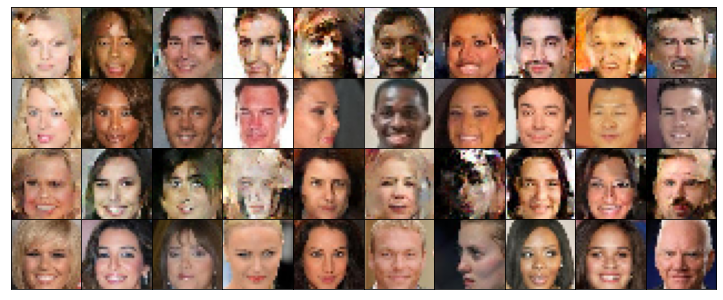

In [0]:
f = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(4, 10)
for i in range(4):
    for j in range(10):
        ax = plt.subplot(gs[i,j])
        ax.imshow(sample[10*i+j].reshape(32,32,3))
        ax.set_xticks([])
        ax.set_yticks([])
f.subplots_adjust(hspace = 0, wspace=0)
f.subplots_adjust(left = 0.01, right = 0.99, top = 0.99, bottom = 0.01)
#plt.savefig('CelebA_NN_hierarchy.pdf')
plt.show()

#OoD detection (Table 2)

In [0]:
model = torch.load('SIG_FashionMNIST_hierarchy')

In [0]:
data_train, data_test = load_data_fmnist()

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
data_test = torch.tensor(data_test).float().cuda().reshape(len(data_test), 784)
data_test = (data_test + torch.rand_like(data_test)) / 256
data_test = 2*data_test - 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [0]:
logp = model.evaluate_density(data_test, start=-100)

In [0]:
logp_sort = torch.sort(logp)[0]

Horizontal Flip

In [0]:
data_test = torch.flip(data_test.reshape(-1,28,28), dims=[2]).reshape(-1,784)

In [0]:
logp_hflip = model.evaluate_density(data_test, start=-100)

In [0]:
TPR = np.linspace(0,1,10000, endpoint=True)
FPR = [0, ]
for tpr in TPR[1:-1]:
    threshold = logp_sort[int(len(logp_sort)*(1-tpr))]
    FPR.append(torch.sum(logp_hflip>threshold).item() / len(data_test))
FPR.append(1)

In [0]:
print ('AUROC:', np.trapz(TPR, FPR))

AUROC: 0.6356638363836384


Vertical Flip

In [0]:
# horizontal flip back
data_test = torch.flip(data_test.reshape(-1,28,28), dims=[2]).reshape(-1,784)

In [0]:
# vertical flip
data_test = torch.flip(data_test.reshape(-1,28,28), dims=[1]).reshape(-1,784)

In [0]:
logp_vflip = model.evaluate_density(data_test, start=-100)

In [0]:
TPR = np.linspace(0,1,10000, endpoint=True)
FPR = [0, ]
for tpr in TPR[1:-1]:
    threshold = logp_sort[int(len(logp_sort)*(1-tpr))]
    FPR.append(torch.sum(logp_vflip>threshold).item() / len(data_test))
FPR.append(1)

In [0]:
print ('AUROC:', np.trapz(TPR, FPR))

AUROC: 0.8151034703470347


MNIST

In [0]:
data_train, data_test = load_data_mnist()

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
data_test = torch.tensor(data_test).float().cuda().reshape(len(data_test), 784)
data_test = (data_test + torch.rand_like(data_test)) / 256
data_test = 2*data_test - 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [0]:
logp_MNIST = model.evaluate_density(data_test, start=-100)

In [0]:
TPR = np.linspace(0,1,10000, endpoint=True)
FPR = [0, ]
for tpr in TPR[1:-1]:
    threshold = logp_sort[int(len(logp_sort)*(1-tpr))]
    FPR.append(torch.sum(logp_MNIST>threshold).item() / len(data_test))
FPR.append(1)

In [0]:
print ('AUROC:', np.trapz(TPR, FPR))

AUROC: 0.9774352735273527


OMNIGLOT

In [0]:
data_test = np.load('./data/omniglot.npy')

In [0]:
data_test = torch.tensor(data_test).float().cuda().reshape(len(data_test), 784)
data_test = (data_test + torch.rand_like(data_test)) / 256
data_test = 2*data_test - 1

In [0]:
logp_OMNIGLOT = model.evaluate_density(data_test, start=-100)

In [0]:
TPR = np.linspace(0,1,10000, endpoint=True)
FPR = [0, ]
for tpr in TPR[1:-1]:
    threshold = logp_sort[int(len(logp_sort)*(1-tpr))]
    FPR.append(torch.sum(logp_OMNIGLOT>threshold).item() / len(data_test))
FPR.append(1)

In [0]:
print ('AUROC:', np.trapz(TPR, FPR))

AUROC: 0.9900107233788631
